In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [25]:
set.seed(2000)

spotify <- read_csv("complete.csv")
spotify <- spotify |>
    select(-track_title, -artist_name, -track_id) |>
    sample_n(1000)
head(spotify)

Rows: 34740 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): track_title, artist_name, track_id
dbl (14): duration_ms, energy, key, mode, time_signature, acousticness, danc...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
334133,0.468,7,1,4,0.2660,0.659,0.000525,0.0427,-16.647,0.0395,0.505,101.422,1
299630,0.654,4,1,4,0.0383,0.730,0.000264,0.0867,-9.307,0.0634,0.203,95.104,1
182000,0.431,5,1,4,0.2870,0.592,0.031700,0.0973,-9.442,0.0450,0.236,87.533,0
80901,0.834,0,0,4,0.0107,0.707,0.960000,0.2630,-5.237,0.0295,0.866,124.954,0
273707,0.470,1,1,4,0.3800,0.599,0.000000,0.1110,-8.356,0.0376,0.298,127.177,1
271427,0.538,9,1,4,0.5270,0.706,0.143000,0.3880,-9.188,0.0406,0.815,104.899,1


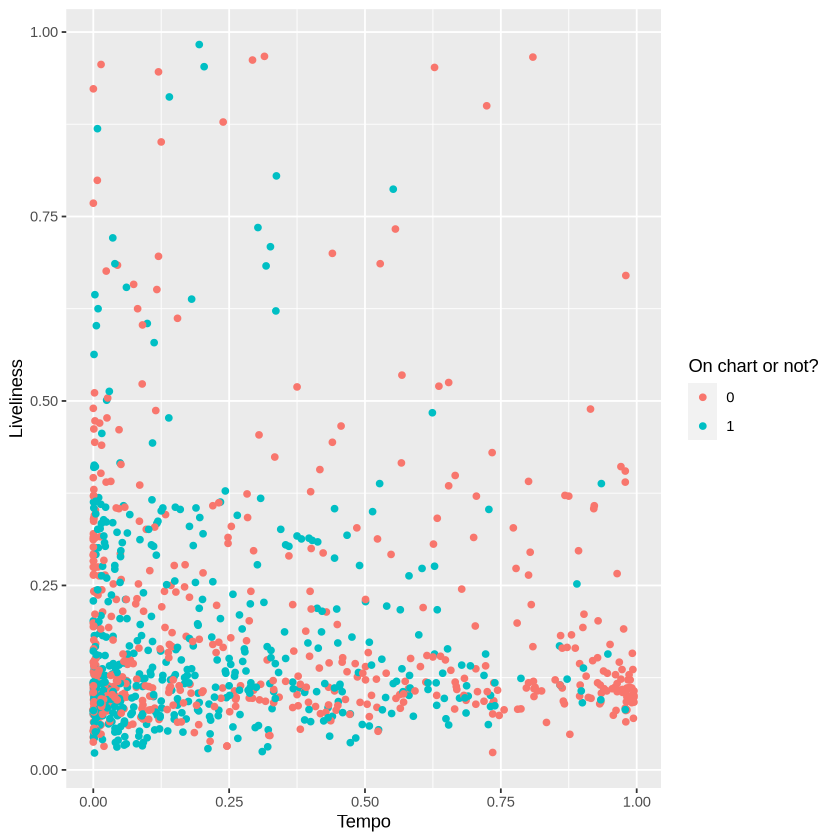

In [32]:
spotify_hit <- spotify 
plot <- ggplot(spotify_hit, aes(x = acousticness, y = liveness, color = as_factor(On_chart))) +
               geom_point() +
               labs(x = "Tempo", y = "Liveliness", color = "On chart or not?")
plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


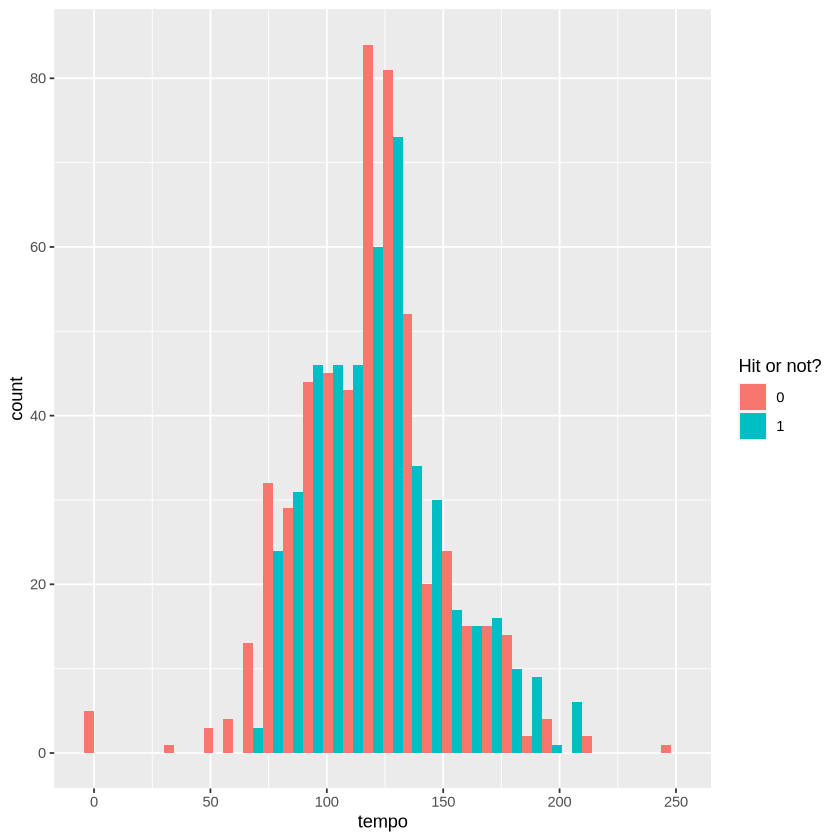

In [90]:
# spotify_hit <- spotify |>
#     filter(On_chart == 1)
dist_plot_dance <- ggplot(spotify, aes(x = tempo, fill=as_factor(On_chart))) +
                    geom_histogram(position="dodge") +
                    labs(fill = "Hit or not?")
# dist_plot_acoustic <- ggplot(spotify, aes(x = energy)) +
#                     geom_histogram()
# dist_plot_valence <- ggplot(spotify, aes(x = instrumentalness)) +
#                     geom_histogram()


# dist_plot_acoustic
# dist_plot_valence
dist_plot_dance